In [3]:
#Resizes depth files because SOMEONE forgot to change the resolution of the camera between runs.

import skimage.color
import numpy as np
import matplotlib.pyplot as plt
import imageio
import time
import cv2
import glob
import os

filename_source = 'BCS_aligned_sorted'
filename_destination = 'BCS_aligned_sorted_resized'
filenames_total = glob.glob(filename_source+'\\*\\*\\*')
filenames_depth = []
for image in filenames_total:
    if image.endswith('_D.tif'):
        filenames_depth.append(image)

filenames_color = []
for image in filenames_total:
    if image.endswith('_C.tif'):
        filenames_color.append(image)
#print(filenames)


for cow_dir in glob.glob(filename_source+'*\\*\\'):
    try:
        os.mkdir(cow_dir.replace(filename_source, filename_destination))
    except:
        pass
for cow_dir in glob.glob(filename_source+'*\\*\\*\\'):
    try:
        os.mkdir(cow_dir.replace(filename_source, filename_destination))
    except:
        pass


for image_name in filenames_depth:
    if image_name.endswith('_D.tif'):
        img = imageio.imread(image_name)
        if np.shape(img)[1] == 640:
            imageio.imwrite(str(image_name).replace(filename_source, filename_destination), img, 'TIFF')
        if np.shape(img)[1] == 848:
            new_img = img[:, 104:-104]
            imageio.imwrite(str(image_name).replace(filename_source, filename_destination), new_img, 'TIFF')
            

for image_name in filenames_color: 
    if image_name.endswith('_C.tif'):
        img = imageio.imread(image_name)
        #img_HSI = skimage.color.rgb2hsv(img)
        #imageio.imwrite(str(image_name).replace(filename_source, 'BCS_sorted_resized'), img_HSI, 'TIFF')
        imageio.imwrite(str(image_name).replace(filename_source, filename_destination), img, 'TIFF')
 

# temp_max_vec = [0, 0, 0, 0, 0, 0]
# temp_max = 0
# for img_name in filenames:
#     if img_name.endswith('_D.tif'):
#         temp_max = np.max(imageio.imread(img_name))
#     if (temp_max >= temp_max_vec[0]) and (temp_max < 10000):
#         temp_max_vec[5] = temp_max_vec[4]
#         temp_max_vec[4] = temp_max_vec[3]
#         temp_max_vec[3] = temp_max_vec[2]
#         temp_max_vec[2] = temp_max_vec[1]
#         temp_max_vec[1] = temp_max_vec[0]
#         temp_max_vec[0] = temp_max

# print(temp_max_vec)

KeyboardInterrupt: 

In [12]:
import skimage.color
import skimage.filters
import numpy as np
import matplotlib.pyplot as plt
import imageio
import time
import cv2
import glob
import os
from astropy.io import fits

def image_preprocessing(filepath):
    img = imageio.imread(filepath)
    background = imageio.imread("masks\\background.tif")
    img = background - img

    otsu_thresh = skimage.filters.threshold_otsu(img)
    img_post = np.where(img<otsu_thresh, img, 0)

    img_post = np.where(img_post>600, img, 0)

    img_mask = np.where(img_post != 0, 1, 0)
    img_seg = skimage.measure.label(img_mask, background = 0, connectivity=2)
    assert( img_seg.max() != 0 )
    mask = img_seg == np.argmax(np.bincount(img_seg.flat)[1:])+1

    depth_img = np.where(mask != 0, img, 0)

    return depth_img, mask

def gauss_lowpass(M,N,cm,cn,sigma):
  # D = np.zeros((M, N))
  # u = range(0, M)
  # v = range(0, N)
  x, y = np.meshgrid(range(0, M), range(0, N))
  D = ((x-cm)**2+(y-cn)**2)**(1/2)
  G = np.exp((-1*D**2)/(2*sigma**2))
  # for i in range(0, M):
  #   for j in range(0, N):
  #     D[i, j] = ((u[i]-cm)**2+(v[j]-cn)**2)**(1/2)
  # G = np.zeros((M, N))
  # G = exp((-1*D**2)/(2*sigma**2))




  return G

In [4]:
#For HSV to Hue, Depth, Value
import skimage.color
import numpy as np
import matplotlib.pyplot as plt
import imageio
import time
import cv2
import glob
import os

filename_source = 'BCS_aligned_sorted'
filename_destination = 'BCS_aligned_sorted_HDV'

for cow_dir in glob.glob(filename_source+'*\\*\\'):
    try:
        os.mkdir(cow_dir.replace(filename_source, filename_destination))
    except:
        pass
for cow_dir in glob.glob(filename_source+'*\\*\\*\\'):
    try:
        os.mkdir(cow_dir.replace(filename_source, filename_destination))
    except:
        pass

    


filename = 'BCS_aligned_sorted'
destination = 'BCS_aligned_sorted_HDV'
filenames_total = glob.glob(filename+'\\*\\*\\*')
filenames_depth = []
for image in filenames_total:
    if image.endswith('_D.tif'):
        filenames_depth.append(image)

filenames_color = []
for image in filenames_total:
    if image.endswith('_C.tif'):
        filenames_color.append(image)


#For HSV to Hue, Depth, Value
for i in range(0, len(filenames_color)):
    for j in range(i, len(filenames_depth)):
        if (os.path.basename(filenames_color[i][:-len('_C.tif')-1])==os.path.basename(filenames_depth[j][:-len('_C.tif')-1])) and (filenames_color[i][len('BCS_aligned_sorted/4/'):-len(os.path.basename(filenames_color[i]))-1]==filenames_depth[j][len('BCS_aligned_sorted/4/'):-len(os.path.basename(filenames_depth[j]))-1]):
            
            temp_filename = filenames_color[i].replace('BCS_aligned_sorted', destination)
            temp_filename = temp_filename.replace('C.tif', 'HDV.tif')
            img_HSV = imageio.imread(filenames_color[i])
            # try:
            img_depth, mask = image_preprocessing(filenames_depth[j])
            # depth_padded = np.pad(img_depth, ((0, np.shape(img_depth)[0]), (0, np.shape(img_depth)[1])))
            # DEPTH_SHIFT = np.fft.fftshift(np.fft.fft2(depth_padded))
            # H = gauss_lowpass(np.shape(depth_padded)[0], np.shape(depth_padded)[1], np.shape(depth_padded)[0]/2, np.shape(depth_padded)[1]/2, 30)
            # DEPTH_SHIFT_FILTERED = DEPTH_SHIFT*(1-H)
            # depth_filtered = np.real(np.fft.ifft2(np.fft.fftshift(DEPTH_SHIFT_FILTERED)))[0:np.shape(img_depth)[0], 0:np.shape(img_depth)[1]]
            #     # img_depth = imageio.imread(filenames_depth[j])
                # img_depth[img_depth>2500] = 2500
                #print(np.max(img_depth))
            img_depth = (img_depth/np.max(img_depth)*255).astype('uint8')
            # except:
            #     print(filenames_depth[j])
            #     break
            img_HSV[:, :, 1] = img_depth
            # try:
            #     # os.mkdir(destination+'\\'+filenames_color[i][len('BCS_sorted_resized/'):-len(os.path.basename(filenames_color[i]))-1])
            #     # os.mkdir('BCS_sorted_HDV_fits\\'+filenames_color[i][len('BCS_sorted_resized/'):-len(os.path.basename(filenames_color[i]))-1])
            # except:
            #     pass
            # # hdu = fits.PrimaryHDU((img_HSV*255).astype('uint8'))
            # # hdu.writeto(temp_filename, output_verify='silentfix', overwrite=True)
            # img_depth = skimage.color.gray2rgb(img_depth)
            # imageio.imwrite(temp_filename, img_depth, 'TIFF')
            img_HSV[:, :, 0] = img_HSV[:, :, 0]*mask
            img_HSV[:, :, 1] = img_HSV[:, :, 1]*mask
            img_HSV[:, :, 2] = img_HSV[:, :, 2]*mask
            imageio.imwrite(temp_filename, img_HSV, 'TIFF')
#print(np.max(img_HSV))

In [7]:
#For Depth to Depth, Highpass Filtered, and Edges
import skimage.feature
import numpy as np
import os
import skimage.color
import numpy as np
import matplotlib.pyplot as plt
import imageio
import glob
import os

filename_source = 'BCS_aligned_sorted_filtered'
filename_destination = 'BCS_aligned_sorted_DHE'

for cow_dir in glob.glob(filename_source+'*\\*\\'):
    try:
        os.mkdir(cow_dir.replace(filename_source, filename_destination))
    except:
        pass
for cow_dir in glob.glob(filename_source+'*\\*\\*\\'):
    try:
        os.mkdir(cow_dir.replace(filename_source, filename_destination))
    except:
        pass

    


filename = 'BCS_aligned_sorted_filtered'
destination = 'BCS_aligned_sorted_DHE'
filenames_total = glob.glob(filename+'\\*\\*\\*')
filenames_depth = []
for image in filenames_total:
    if image.endswith('_D.tif'):
        filenames_depth.append(image)

# filenames_color = []
# for image in filenames_total:
#     if image.endswith('_C.tif'):
#         filenames_color.append(image)



# for i in range(0, len(filenames_color)):
for j in range(0, len(filenames_depth)):
    #if (os.path.basename(filenames_color[i][:-len('_C.tif')-1])==os.path.basename(filenames_depth[j][:-len('_C.tif')-1])) and (filenames_color[i][len('BCS_aligned_sorted/4/'):-len(os.path.basename(filenames_color[i]))-1]==filenames_depth[j][len('BCS_aligned_sorted/4/'):-len(os.path.basename(filenames_depth[j]))-1]):
    try: 
        temp_filename = filenames_depth[j].replace(filename, destination)
        temp_filename = temp_filename.replace('D.tif', 'DHE.tif')
        img_depth, mask = image_preprocessing(filenames_depth[j])
        #img_depth = (img_depth/np.max(img_depth)*255).astype('uint8')
        img_DHE = np.zeros((np.shape(img_depth)[0], np.shape(img_depth)[1], 3))

        depth_padded = np.pad(img_depth, ((0, np.shape(img_depth)[0]), (0, np.shape(img_depth)[1])))
        # img_depth = (img_depth/np.max(img_depth)*255).astype('uint8')
        DEPTH_SHIFT = np.fft.fftshift(np.fft.fft2(depth_padded))
        H = gauss_lowpass(np.shape(depth_padded)[1], np.shape(depth_padded)[0], np.shape(depth_padded)[1]/2, np.shape(depth_padded)[0]/2, 70)
        DEPTH_SHIFT_FILTERED = DEPTH_SHIFT*(1-H)
        depth_filtered = np.real(np.fft.ifft2(np.fft.fftshift(DEPTH_SHIFT_FILTERED)))[0:np.shape(img_depth)[0], 0:np.shape(img_depth)[1]]
            
        img_depth = (img_depth/np.max(img_depth)*255).astype('uint8')

        img_DHE[:, :, 0] = img_depth
        img_DHE[:, :, 1] = depth_filtered*mask
        img_DHE[:, :, 2] = skimage.feature.canny(img_depth, sigma=1.0).astype('uint8')*255

        imageio.imwrite(temp_filename, img_DHE.astype('uint8'), 'TIFF')

    except FileNotFoundError:
        print(temp_filename)


<class 'numpy.bool_'>


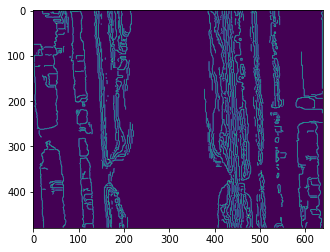

In [8]:
img_depth = (imageio.imread('BCS_aligned_sorted\\3\\Cow_12\\0_D.tif')).astype('uint8')
img_2, mask = image_preprocessing('BCS_aligned_sorted\\3\\Cow_12\\0_D.tif')

print(type(mask[0,0]))


img_edge = skimage.feature.canny(img_depth, sigma=1.0).astype('uint8')*255
plt.imshow(img_edge)

In [13]:
#For Depth to Depth
import skimage.feature
import numpy as np
import os
import skimage.color
import numpy as np
import matplotlib.pyplot as plt
import imageio
import glob
import os

filename_source = 'BCS_aligned_sorted'
filename_destination = 'BCS_aligned_sorted_D'

for cow_dir in glob.glob(filename_source+'*\\*\\'):
    try:
        os.mkdir(cow_dir.replace(filename_source, filename_destination))
    except:
        pass
for cow_dir in glob.glob(filename_source+'*\\*\\*\\'):
    try:
        os.mkdir(cow_dir.replace(filename_source, filename_destination))
    except:
        pass

    


filename = 'BCS_aligned_sorted'
destination = 'BCS_aligned_sorted_D'
filenames_total = glob.glob(filename+'\\*\\*\\*')
filenames_depth = []
for image in filenames_total:
    if image.endswith('_D.tif'):
        filenames_depth.append(image)

# filenames_color = []
# for image in filenames_total:
#     if image.endswith('_C.tif'):
#         filenames_color.append(image)



# for i in range(0, len(filenames_color)):
for j in range(0, len(filenames_depth)):
    #if (os.path.basename(filenames_color[i][:-len('_C.tif')-1])==os.path.basename(filenames_depth[j][:-len('_C.tif')-1])) and (filenames_color[i][len('BCS_aligned_sorted/4/'):-len(os.path.basename(filenames_color[i]))-1]==filenames_depth[j][len('BCS_aligned_sorted/4/'):-len(os.path.basename(filenames_depth[j]))-1]):
    try: 
        temp_filename = filenames_depth[j].replace('BCS_aligned_sorted', destination)
        img_depth, mask = image_preprocessing(filenames_depth[j])
        #img_depth = (img_depth/np.max(img_depth)*255).astype('uint8')
        img_D = np.zeros((np.shape(img_depth)[0], np.shape(img_depth)[1]))

        # depth_padded = np.pad(img_depth, ((0, np.shape(img_depth)[0]), (0, np.shape(img_depth)[1])))
        # # img_depth = (img_depth/np.max(img_depth)*255).astype('uint8')
        # DEPTH_SHIFT = np.fft.fftshift(np.fft.fft2(depth_padded))
        # H = gauss_lowpass(np.shape(depth_padded)[1], np.shape(depth_padded)[0], np.shape(depth_padded)[0]/2, np.shape(depth_padded)[1]/2, 50)
        # DEPTH_SHIFT_FILTERED = DEPTH_SHIFT*(1-H)
        # depth_filtered = np.real(np.fft.ifft2(np.fft.fftshift(DEPTH_SHIFT_FILTERED)))[0:np.shape(img_depth)[0], 0:np.shape(img_depth)[1]]
            
        img_depth = (img_depth/np.max(img_depth)*255).astype('uint8')

        # img_DHE[:, :, 1] = depth_filtered*mask
        # img_DHE[:, :, 2] = skimage.feature.canny(img_depth, sigma=1.0)
        if ((temp_filename.find("Cow_5") == -1) and (temp_filename.find("Cow_5_1") == -1) and (temp_filename.find("Cow_5") == -1) and (temp_filename.find("Cow_1") == -1) and (temp_filename.find("Cow_19") == -1) and (temp_filename.find("Cow_32") == -1) and (temp_filename.find("Cow_40") == -1)):
            imageio.imwrite(temp_filename, img_depth.astype('uint8'), 'TIFF')
        if ((temp_filename.find("Cow_5") != -1) or (temp_filename.find("Cow_5_1") != -1) or (temp_filename.find("Cow_5") != -1) or (temp_filename.find("Cow_1") != -1) or (temp_filename.find("Cow_19") != -1) or (temp_filename.find("Cow_32") != -1) or (temp_filename.find("Cow_40") != -1)):
            temp_filename.replace(destination, 'BCS_test_only_D')
            imageio.imwrite(temp_filename, img_depth.astype('uint8'), 'TIFF')

    except FileNotFoundError:
        print(temp_filename)


In [ ]:
from astropy.io import fits
#fits_image_filename = fits.util.get_testdata_filepath('BCS_sorted_HDV\\4\\Cow_34\\406_HDV.fits')


image_data = fits.getdata('BCS_sorted_HDV\\4\\Cow_34\\406_HDV.fits', ext=0)  # assume the first extension is an image


with fits.open('BCS_sorted_HDV\\4\\Cow_34\\406_HDV.fits') as img: # read in fits image
    img.verify('silentfix')
    img = img[0].data
    plt.imshow(img)

In [15]:
hdu = fits.PrimaryHDU(np.zeros((640, 480, 3)))
hdu.writeto('placeholder.fits', output_verify='silentfix', overwrite=True)

255


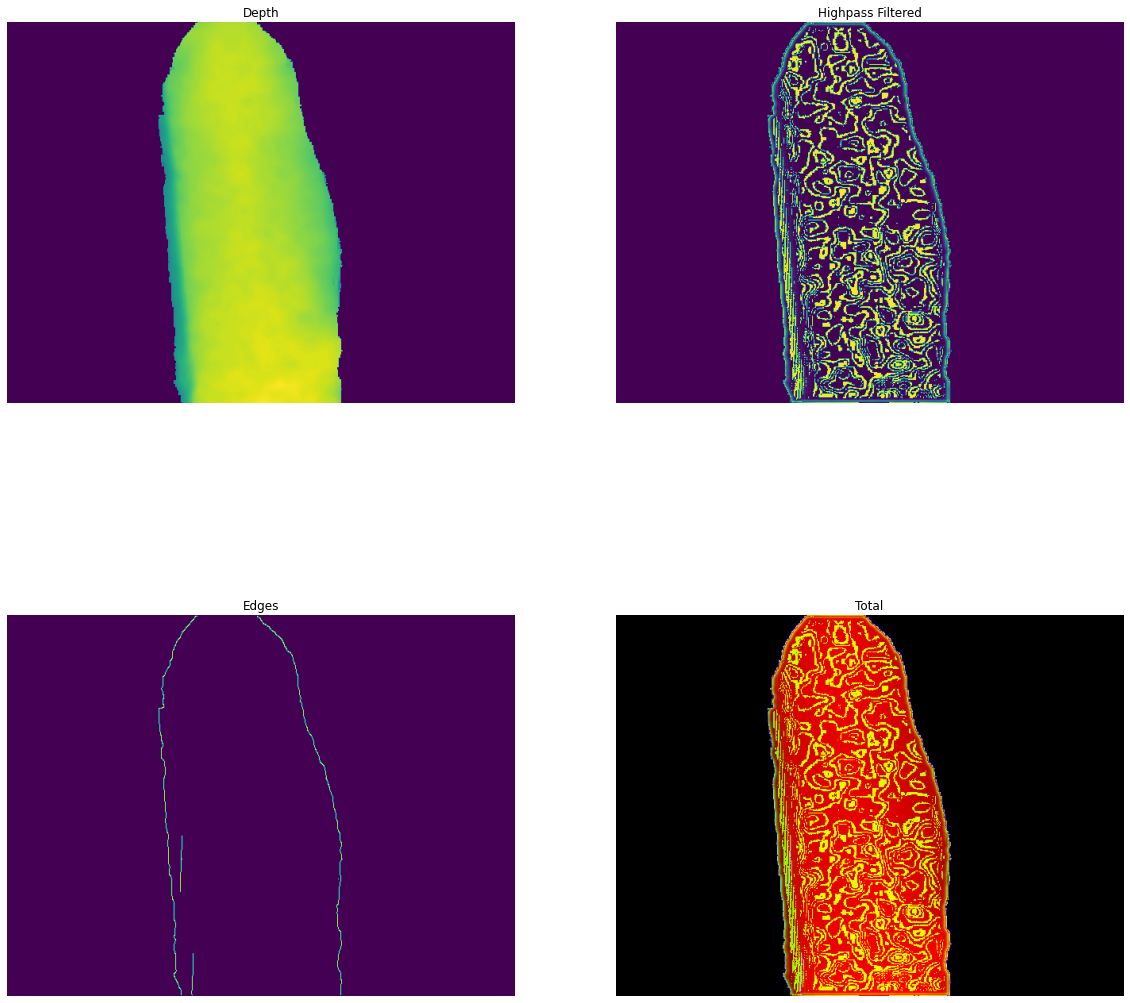

In [57]:
#print(np.max(img_HSV))
import skimage.feature
import numpy as np
import os
import skimage.exposure
import skimage.morphology
import numpy as np
import matplotlib.pyplot as plt
import imageio
import glob
import os

img_depth, mask = image_preprocessing('10_21_data_aligned_filtered\Cow_46\\238_D.tif')
img_depth = (img_depth/np.max(img_depth)*255).astype('uint8')


img = (imageio.imread('BCS_aligned_sorted_DHE\\2\\Cow_46\\238_DHE.tif')).astype('uint8')
plt.figure(figsize=(20,20))
plt.subplot(2, 2, 1)
plt.imshow(img[:, :, 0])
plt.title('Depth')
plt.axis('off')
plt.subplot(2, 2, 2)
plt.imshow(img[:, :, 1])
plt.title('Highpass Filtered')
plt.axis('off')
plt.subplot(2, 2, 3)
plt.imshow(img[:, :, 2])
plt.title('Edges')
plt.axis('off')
plt.subplot(2, 2, 4)
plt.imshow(img)
plt.title('Total')
plt.axis('off')

print(np.max(img[:, :, 0]))
#print(filenames_color[i][len('BCS_sorted_resized/4/'):-len(os.path.basename(filenames_color[i]))-1])

9823
BCS_sorted\2\Cow_11\100_D.tif
['BCS_sorted\\2\\Cow_11\\', 'BCS_sorted\\2\\Cow_11_2\\', 'BCS_sorted\\2\\Cow_46\\', 'BCS_sorted\\2\\Cow_46_1\\', 'BCS_sorted\\2\\Cow_46_2\\', 'BCS_sorted\\2\\Cow_5\\', 'BCS_sorted\\2\\Cow_5_1\\', 'BCS_sorted\\3\\Cow_1\\', 'BCS_sorted\\3\\Cow_12\\', 'BCS_sorted\\3\\Cow_14\\', 'BCS_sorted\\3\\Cow_16_1\\', 'BCS_sorted\\3\\Cow_16_2\\', 'BCS_sorted\\3\\Cow_22_1_other_camera_says_23\\', 'BCS_sorted\\3\\Cow_26\\', 'BCS_sorted\\3\\Cow_4\\', 'BCS_sorted\\3\\Cow_42\\', 'BCS_sorted\\3\\Cow_47_1\\', 'BCS_sorted\\3\\Cow_48\\', 'BCS_sorted\\3\\Cow_4_1\\', 'BCS_sorted\\3\\Cow_53\\', 'BCS_sorted\\4\\Cow_10_1\\', 'BCS_sorted\\4\\Cow_13_1\\', 'BCS_sorted\\4\\Cow_15\\', 'BCS_sorted\\4\\Cow_17_maybe_16\\', 'BCS_sorted\\4\\Cow_19\\', 'BCS_sorted\\4\\Cow_2\\', 'BCS_sorted\\4\\Cow_20\\', 'BCS_sorted\\4\\Cow_21\\', 'BCS_sorted\\4\\Cow_23_1\\', 'BCS_sorted\\4\\Cow_24\\', 'BCS_sorted\\4\\Cow_27\\', 'BCS_sorted\\4\\Cow_27_1\\', 'BCS_sorted\\4\\Cow_29\\', 'BCS_sorted\\4\\Cow_30\

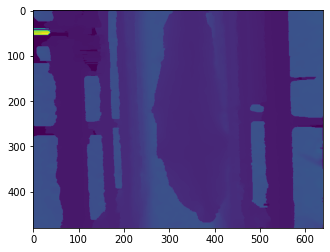

In [ ]:
img = imageio.imread(filenames_total[4001])

plt.imshow(img)
print(np.max(img))
print(filenames_total[1])

print(glob.glob(filename+'*\\*\\*\\'))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


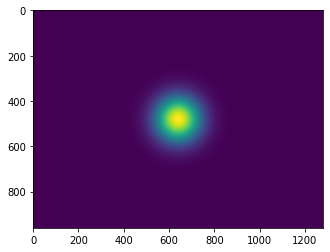

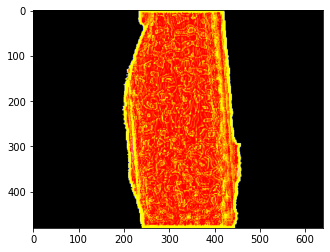

In [39]:
img_depth, mask = image_preprocessing('BCS_aligned_sorted\\5\\Cow_32\\14_D.tif')
img_depth = (img_depth/np.max(img_depth)*255).astype('uint8')

#img_depth = skimage.exposure.equalize_adapthist(img_depth, kernel_size=69, clip_limit=0.01, nbins=256)



img_DHE = np.zeros((np.shape(img_depth)[0], np.shape(img_depth)[1], 3))

depth_padded = np.pad(img_depth, ((0, np.shape(img_depth)[0]), (0, np.shape(img_depth)[1])))
        # img_depth = (img_depth/np.max(img_depth)*255).astype('uint8')
DEPTH_SHIFT = np.fft.fftshift(np.fft.fft2(depth_padded))
H = gauss_lowpass(np.shape(depth_padded)[1], np.shape(depth_padded)[0], np.shape(depth_padded)[1]/2, np.shape(depth_padded)[0]/2, 70)
plt.figure()
plt.imshow(H)
DEPTH_SHIFT_FILTERED = DEPTH_SHIFT*(1-H)
depth_filtered = np.real(np.fft.ifft2(np.fft.fftshift(DEPTH_SHIFT_FILTERED)))[0:np.shape(img_depth)[0], 0:np.shape(img_depth)[1]]
            
#img_depth = (img_depth/np.max(img_depth)*255).astype('uint8')

img_DHE[:, :, 0] = img_depth
img_DHE[:, :, 1] = depth_filtered*mask
img_DHE[:, :, 2] = skimage.feature.canny(img_depth, sigma=1.0)

plt.figure()
plt.imshow(img_DHE)
